# Synthetic Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Point templates

In [3]:
MINLON=144.0
MAXLON=149.0
MINLAT=-44.0
MAXLAT=-40.0

In [4]:
!python2 scripts/generatesdftemplatepoints.py -T 50 -L 50 -S 50 \
	--sdf tas_synthetic/sdf_tas_fine.txt \
	--xmin 144.0 --xmax 149.0 \
	--ymin -44.0 --ymax -40.0 \
	--land-boundary 0.5 \
	--tide-boundary 0.5 \
	-o pointtemplate_50_50_50.txt

/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: can't open file 'scripts/generatesdftemplatepoints.py': [Errno 2] No such file or directory


## Synthetic observations

In [29]:
!	./mksynthetic -i pointtemplate_50_50_50.txt -o syntheticobs_50_50_50_tas.txt \
	-m TasSea \
	-m TasLand \
	--xmin 144.0 --xmax 149.0 \
	--ymin -44.0 --ymax -40.0 \
	-n 1.0 \
	-I syntheticobs_50_50_50_tas

Model  0 : TasSea
Model  1 : TasLand
150 observations


## Synthetic inversion using Voronoi

In [32]:
!mkdir -p results_50_50_50_vv

In [1]:
!	mpirun -np 4 tideshmcpt -i syntheticobs_50_50_50_tas.txt \
	-o results_50_50_50_vv/ \
	-P tas_synthetic/prior_sea.txt -P tas_synthetic/prior_land.txt \
	-M tas_synthetic/positionprior_sea.txt -M tas_synthetic/positionprior_land.txt \
	-x 144.0 -X 149.0 \
	-y -44.0 -Y -40.0 \
	-A 0 -A 0 \
	-C 10 \
	-T 100 \
	-t 1000000 \
	-v 10000 \
	-c 1 \
	-K 4 -m 5.0 -e 10

--------------------------------------------------------------------------
mpirun was unable to find the specified executable file, and therefore
did not launch the job.  This error was first reported for process
rank 0; it may have occurred for other processes as well.

NOTE: A common cause for this error is misspelling a mpirun command
      line parameter option (remember that mpirun interprets the first
      unrecognized command line token as the executable).

Node:       Joels-MBP
Executable: tideshmcpt
--------------------------------------------------------------------------
4 total processes failed to start


## Compute Means

In [58]:
!mpirun -np 1 post_mean_mpi -i results_50_50_50_vv/ch.dat  -o results_50_50_50_vv/mean_sea.txt \
	-x 144.0 -X 149.0 \
	-y -44.0 -Y -40.0 \
	-T 100 \
	-A 0 -A 0 \
	-W 50 -H 50 \
	-I 0 \
	-s 500000 -t 10

In [72]:
!mpirun -np 1 post_mean_mpi -i results_50_50_50_vv/ch.dat  -o results_50_50_50_vv/mean_land.txt \
	-x 144.0 -X 149.0 \
	-y -44.0 -Y -40.0 \
	-T 100 \
	-A 0 -A 0 \
	-W 50 -H 50 \
	-I 1 \
	-s 500000 -t 10

In [73]:
!mpirun -np 1 post_mean_tide_mpi -i results_50_50_50_vv/ch.dat  -o results_50_50_50_vv/mean_tide.txt \
	-x 144.0 -X 149.0 \
	-y -44.0 -Y -40.0 \
	-T 100 \
	-A 0 -A 0 \
	-W 50 -H 50 \
	-s 500000 -t 10

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


## Visualize Means

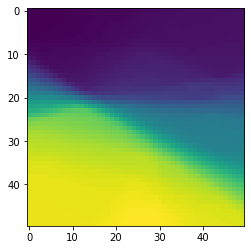

In [74]:
res = np.loadtxt("results_50_50_50_vv/mean_sea.txt")
plt.imshow(res)

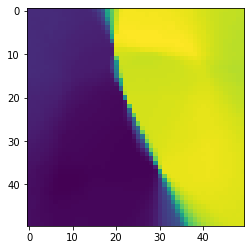

In [75]:
res = np.loadtxt("results_50_50_50_vv/mean_land.txt")
plt.imshow(res)

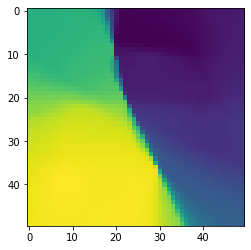

In [76]:
res = np.loadtxt("results_50_50_50_vv/mean_tide.txt")
plt.imshow(res)

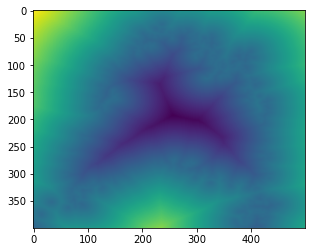

In [79]:
res = np.loadtxt("tas_synthetic/sdf_tas_fine.txt")
plt.imshow(res)

In [60]:
res = np.loadtxt("syntheticobs_50_50_50_tas.A")

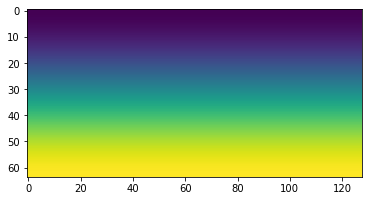

In [61]:
plt.imshow(res)